# Housing Data

- Reading data
- See Null Values and data types
- droping usless columns
- converting (object) columns to (category)
- Data visualaisation
- Encoding category data
- Check for outliers
- Scaling data

# Reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Check null and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# Converting object columns to category columns

In [6]:
object_cols = df.select_dtypes("object").columns
object_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df[object_cols] = df[object_cols].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [9]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Check for corr between columns

In [10]:
df.corr()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13200\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


C:\Users\mahmo\AppData\Local\Temp\ipykernel_13200\379417841.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<Axes: >

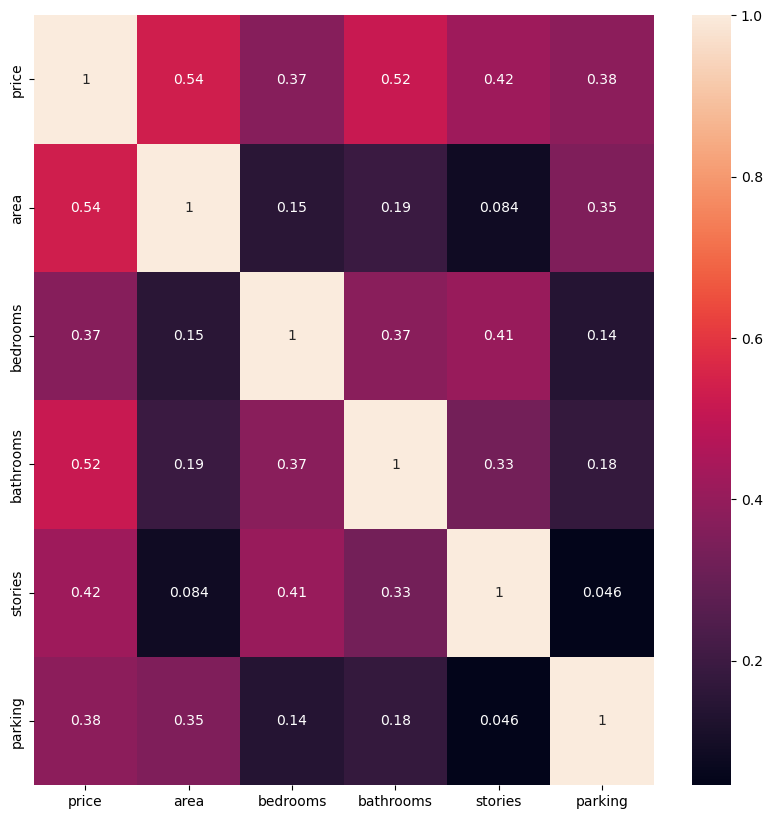

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot=True)

# Shifting target column to be the last column

In [12]:
cols = df.columns.to_list()
cols

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [13]:
cols.pop(0)
cols.append("price")

In [14]:
cols


['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus',
 'price']

In [15]:
df = df[cols]

In [16]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


In [17]:
category_cols = "bedrooms bathrooms stories mainroad guestroom basement hotwaterheating airconditioning parking prefarea furnishingstatus".split()
df[category_cols] = df[category_cols].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   area              545 non-null    int64   
 1   bedrooms          545 non-null    category
 2   bathrooms         545 non-null    category
 3   stories           545 non-null    category
 4   mainroad          545 non-null    category
 5   guestroom         545 non-null    category
 6   basement          545 non-null    category
 7   hotwaterheating   545 non-null    category
 8   airconditioning   545 non-null    category
 9   parking           545 non-null    category
 10  prefarea          545 non-null    category
 11  furnishingstatus  545 non-null    category
 12  price             545 non-null    int64   
dtypes: category(11), int64(2)
memory usage: 16.2 KB


# check for outliers

In [18]:
numeric_cols = df.select_dtypes("number").columns
df[numeric_cols]

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


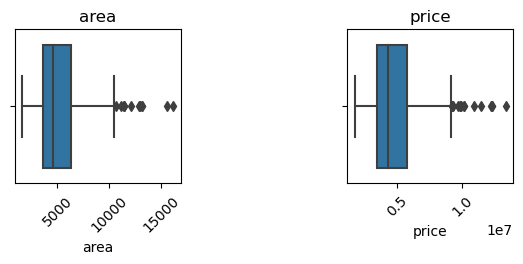

In [19]:
plt.figure(figsize=(15,10))

for i ,col in enumerate(df[numeric_cols]):
    plt.subplot(3,4,i+1)
    plt.title(f"{col}")
    sns.boxplot(x=col , data=df)
    plt.xticks(rotation = 45)
plt.subplots_adjust(hspace=1 , wspace=1)
plt.show()

# get upper pounds

In [20]:
q3 = df["area"].quantile(.75)
q1 = df["area"].quantile(.25)
IQR = q3 - q1
upper_pound = q3 +1.5 *IQR

# detecting outliers

In [21]:
outliers = df[df["area"]>upper_pound]["area"].values

In [22]:
outliers

array([16200, 13200, 11440, 11175, 13200, 12090, 15600, 11460, 11410,
       10700, 12900, 12944], dtype=int64)

In [23]:
df.replace([outliers] , upper_pound , inplace=True)

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='area'>

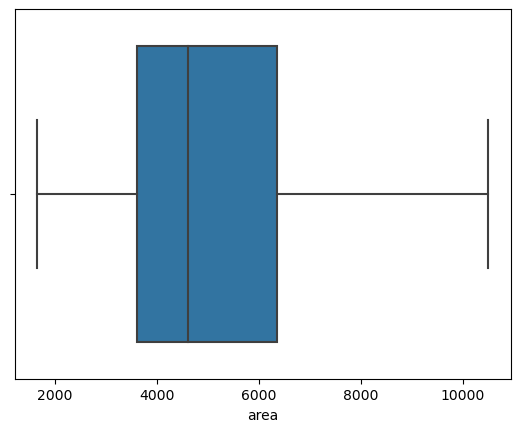

In [24]:
sns.boxplot(df["area"])

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='price'>

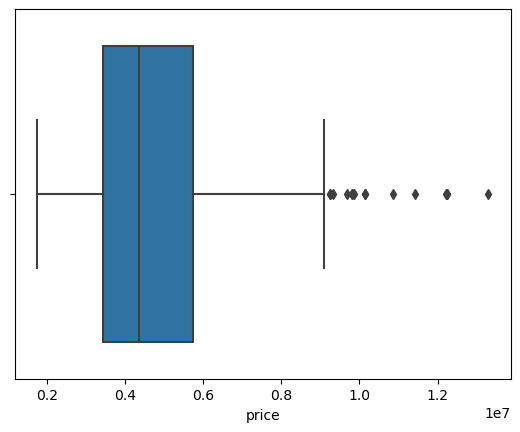

In [25]:
sns.boxplot(df["price"])

# Data visulaisation
- category columns with target column
- each of these columns has a corr and efficting in price column

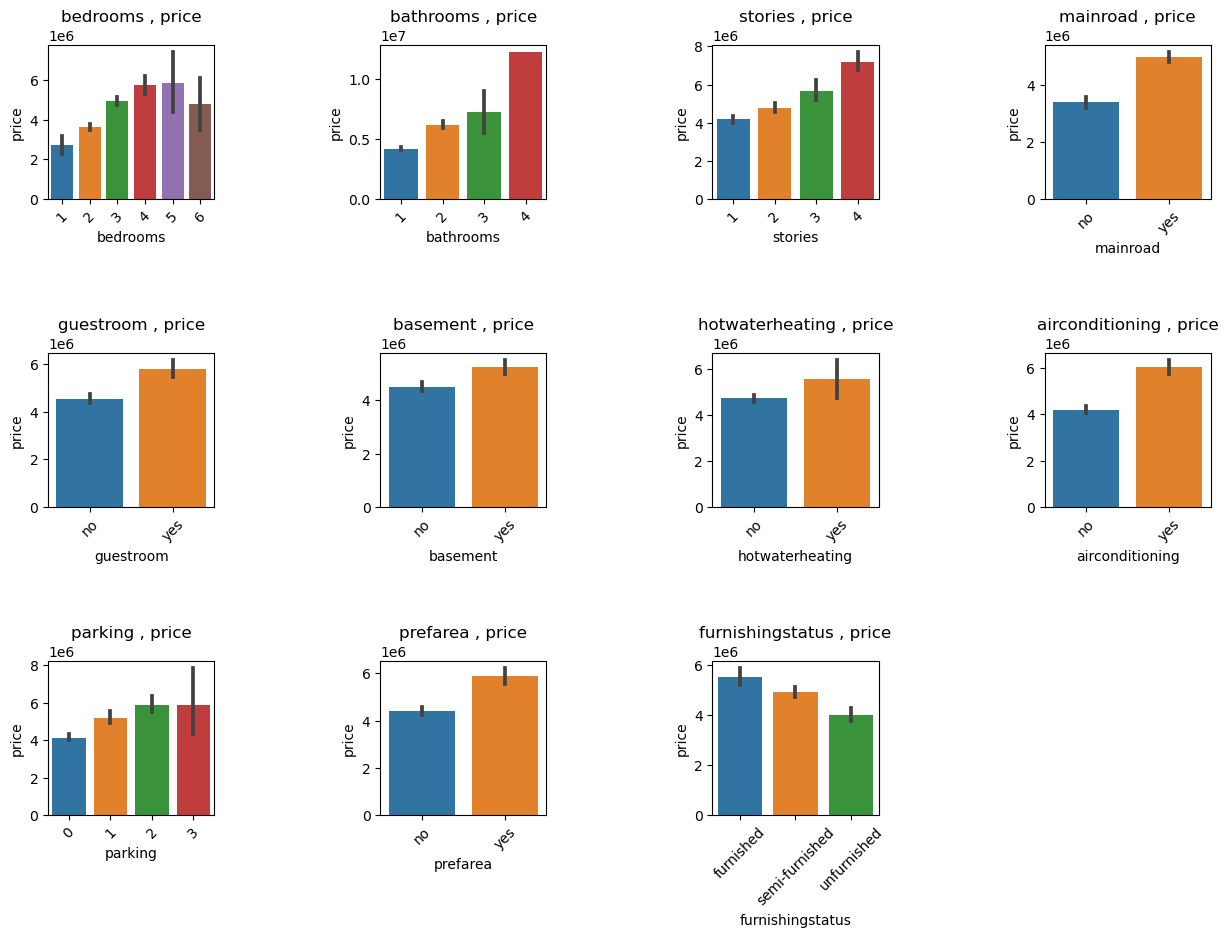

In [26]:
plt.figure(figsize=(15,10))

for i ,col in enumerate(df[category_cols]):
    plt.subplot(3,4,i+1)
    plt.title(f"{col} , price")
    sns.barplot(x=col , y=df["price"] , data=df)
    plt.xticks(rotation = 45)
plt.subplots_adjust(hspace=1 , wspace=1)
plt.show()

- numirec column with target column

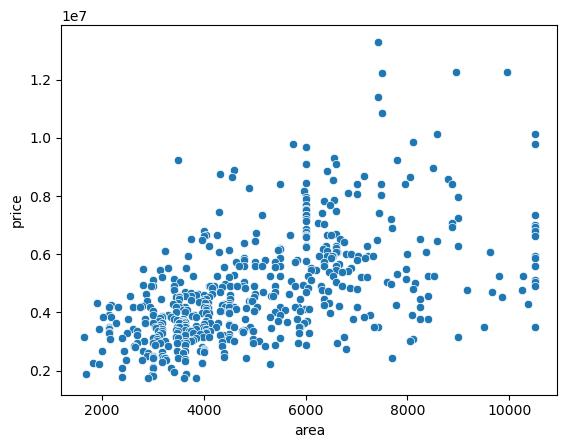

In [27]:
sns.scatterplot(x="area" ,y= "price" ,data= df)
plt.show()

In [28]:
pd.pivot_table(index="airconditioning" , columns="hotwaterheating" , values="price", data=df, aggfunc=sum)

hotwaterheating,no,yes
airconditioning,,
no,1428234500,135359000
yes,1030633940,3640000


<Axes: xlabel='hotwaterheating', ylabel='airconditioning'>

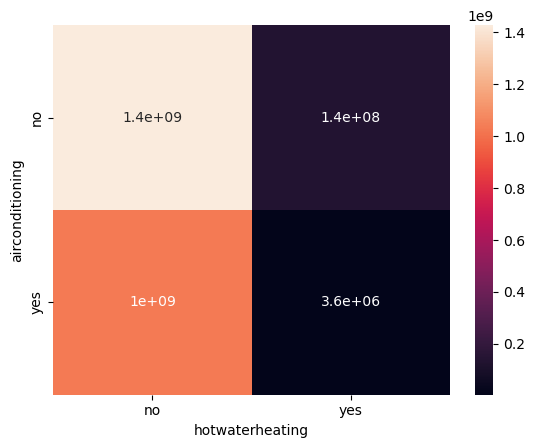

In [29]:
sns.heatmap(pd.pivot_table(index="airconditioning" , columns="hotwaterheating" , values="price", data=df, aggfunc=sum),annot=True)

<Axes: xlabel='hotwaterheating', ylabel='airconditioning'>

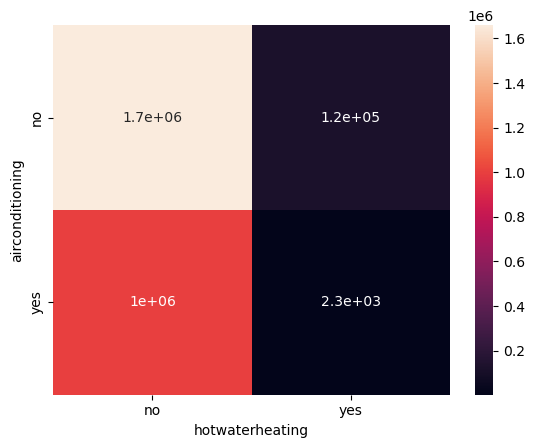

In [30]:
sns.heatmap(pd.pivot_table(index="airconditioning" , columns="hotwaterheating" , values="area", data=df, aggfunc=sum),annot=True)

<Axes: xlabel='mainroad', ylabel='area'>

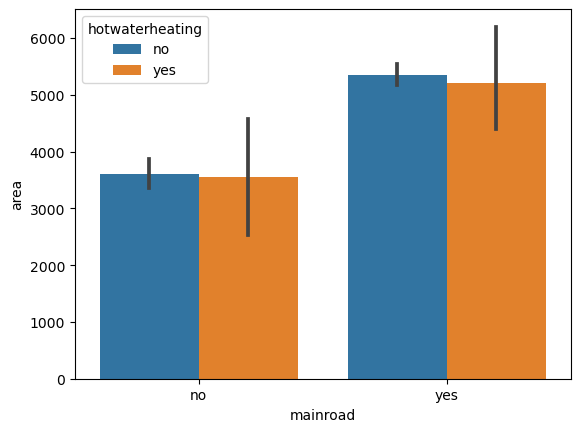

In [31]:
sns.barplot(x="mainroad" , y="area" , data=df , hue="hotwaterheating")

<Axes: xlabel='mainroad', ylabel='area'>

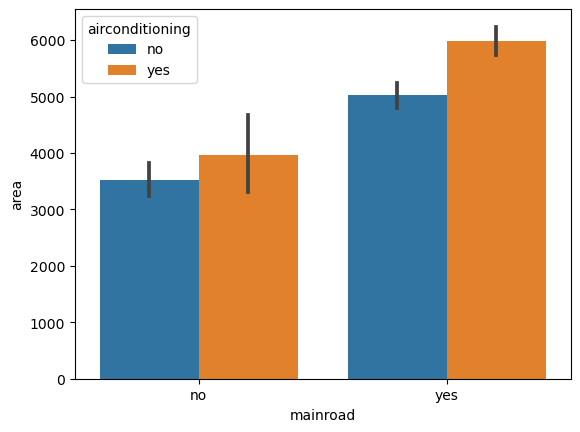

In [32]:
sns.barplot(x="mainroad" , y="area" , data=df , hue="airconditioning")

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='airconditioning', ylabel='count'>

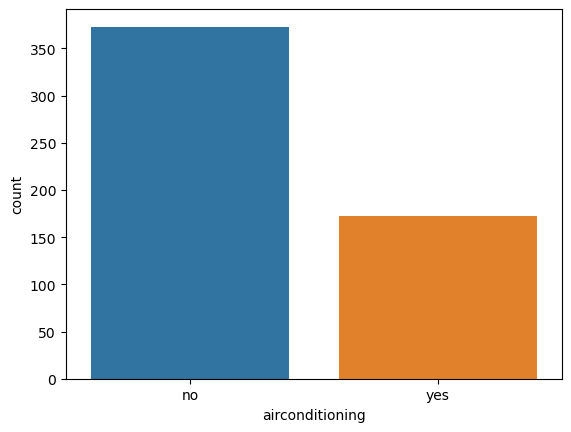

In [33]:
sns.countplot(df["airconditioning"])

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='hotwaterheating', ylabel='count'>

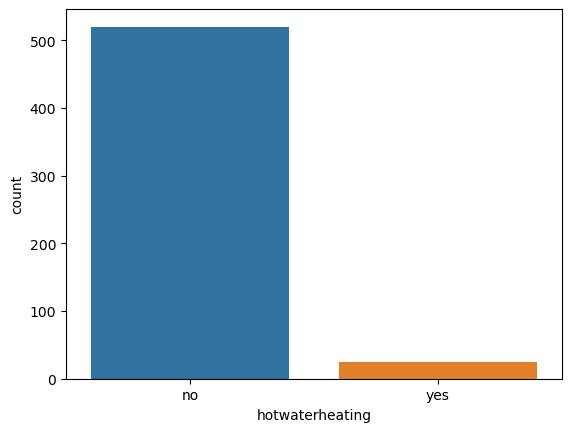

In [34]:
sns.countplot(df["hotwaterheating"])

<Axes: xlabel='mainroad', ylabel='price'>

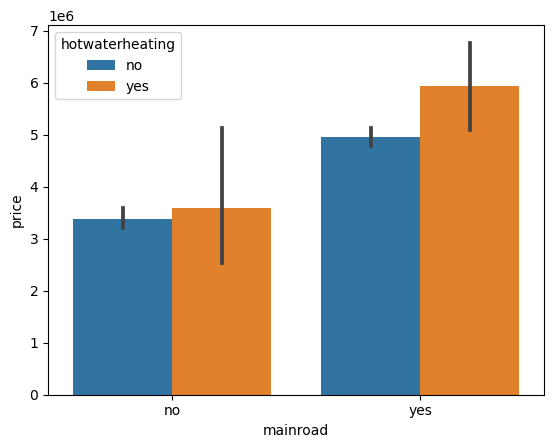

In [35]:
sns.barplot(x="mainroad" , y="price" , data=df , hue="hotwaterheating")

<Axes: xlabel='hotwaterheating', ylabel='price'>

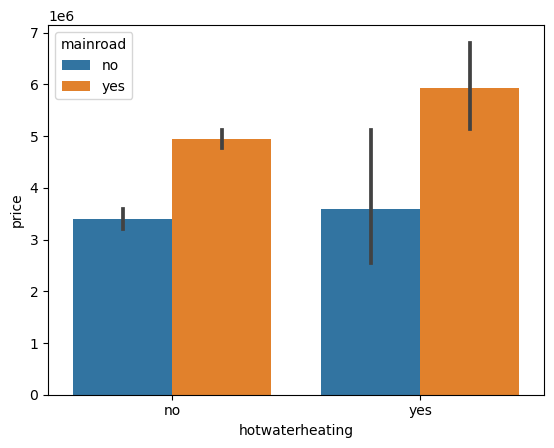

In [36]:
sns.barplot(x="hotwaterheating" , y="price" , data=df , hue="mainroad")

# scaling data

In [37]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
numirec_data = df.select_dtypes("number").columns
df[numirec_data]
y_scaler = MinMaxScaler()
df[["price"]] = y_scaler.fit_transform(df[["price"]])

In [40]:
x_scaler = MinMaxScaler()
df[["area"]] = x_scaler.fit_transform(df[["area"]])

In [41]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.651977,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.000000
1,0.825989,4,4,4,yes,no,no,no,yes,3,no,furnished,0.909091
2,0.938983,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.909091
3,0.661017,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.906061
4,0.651977,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.836364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.006061
541,0.084746,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.001485
542,0.222599,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.000000
543,0.142373,3,1,1,no,no,no,no,no,0,no,furnished,0.000000


# encoding data

In [42]:
df = pd.get_dummies(df , columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"])
df

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.651977,4,2,3,2,furnished,1.000000,0,1,1,0,1,0,1,0,0,1,0,1
1,0.825989,4,4,4,3,furnished,0.909091,0,1,1,0,1,0,1,0,0,1,1,0
2,0.938983,3,2,2,2,semi-furnished,0.909091,0,1,1,0,0,1,1,0,1,0,0,1
3,0.661017,4,2,2,3,furnished,0.906061,0,1,1,0,0,1,1,0,0,1,0,1
4,0.651977,4,1,2,2,furnished,0.836364,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,2,1,1,2,unfurnished,0.006061,0,1,1,0,0,1,1,0,1,0,1,0
541,0.084746,3,1,1,0,semi-furnished,0.001485,1,0,1,0,1,0,1,0,1,0,1,0
542,0.222599,2,1,1,0,unfurnished,0.000000,0,1,1,0,1,0,1,0,1,0,1,0
543,0.142373,3,1,1,0,furnished,0.000000,1,0,1,0,1,0,1,0,1,0,1,0


In [43]:
def encoding(x):
    if x == "furnished":
        return 2
    elif x == "semi-furnished":
        return 1
    else:
        return 0
df["furnishingstatus"] = df["furnishingstatus"].apply(encoding , df["furnishingstatus"])

In [44]:
df

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.651977,4,2,3,2,2,1.000000,0,1,1,0,1,0,1,0,0,1,0,1
1,0.825989,4,4,4,3,2,0.909091,0,1,1,0,1,0,1,0,0,1,1,0
2,0.938983,3,2,2,2,1,0.909091,0,1,1,0,0,1,1,0,1,0,0,1
3,0.661017,4,2,2,3,2,0.906061,0,1,1,0,0,1,1,0,0,1,0,1
4,0.651977,4,1,2,2,2,0.836364,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,2,1,1,2,0,0.006061,0,1,1,0,0,1,1,0,1,0,1,0
541,0.084746,3,1,1,0,1,0.001485,1,0,1,0,1,0,1,0,1,0,1,0
542,0.222599,2,1,1,0,0,0.000000,0,1,1,0,1,0,1,0,1,0,1,0
543,0.142373,3,1,1,0,2,0.000000,1,0,1,0,1,0,1,0,1,0,1,0


In [45]:
cols = df.columns.to_list()
cols

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'furnishingstatus',
 'price',
 'mainroad_no',
 'mainroad_yes',
 'guestroom_no',
 'guestroom_yes',
 'basement_no',
 'basement_yes',
 'hotwaterheating_no',
 'hotwaterheating_yes',
 'airconditioning_no',
 'airconditioning_yes',
 'prefarea_no',
 'prefarea_yes']

In [46]:
cols.pop(6)
cols.append("price")

In [47]:
df = df[cols]
df

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,price
0,0.651977,4,2,3,2,2,0,1,1,0,1,0,1,0,0,1,0,1,1.000000
1,0.825989,4,4,4,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0.909091
2,0.938983,3,2,2,2,1,0,1,1,0,0,1,1,0,1,0,0,1,0.909091
3,0.661017,4,2,2,3,2,0,1,1,0,0,1,1,0,0,1,0,1,0.906061
4,0.651977,4,1,2,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0.836364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,2,1,1,2,0,0,1,1,0,0,1,1,0,1,0,1,0,0.006061
541,0.084746,3,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0.001485
542,0.222599,2,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0.000000
543,0.142373,3,1,1,0,2,1,0,1,0,1,0,1,0,1,0,1,0,0.000000


In [48]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [49]:
x 

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.651977,4,2,3,2,2,0,1,1,0,1,0,1,0,0,1,0,1
1,0.825989,4,4,4,3,2,0,1,1,0,1,0,1,0,0,1,1,0
2,0.938983,3,2,2,2,1,0,1,1,0,0,1,1,0,1,0,0,1
3,0.661017,4,2,2,3,2,0,1,1,0,0,1,1,0,0,1,0,1
4,0.651977,4,1,2,2,2,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,2,1,1,2,0,0,1,1,0,0,1,1,0,1,0,1,0
541,0.084746,3,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
542,0.222599,2,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0
543,0.142373,3,1,1,0,2,1,0,1,0,1,0,1,0,1,0,1,0


# spliting data to train it

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [60]:
poly = PolynomialFeatures(2)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [61]:
model = LinearRegression()
model.fit(poly_X_train, y_train)

LinearRegression()

# calculate mean squared error

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:

tr_pred = model.predict(poly_X_train)
ts_pred = model.predict(poly_X_test)

tr_err = mean_squared_error(y_train, tr_pred)
ts_err = mean_squared_error(y_test, ts_pred)

print(np.round(tr_err))
print(np.round(ts_err))

0.0
0.0
